In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def regret(x,y,timesteps):
    regret=(timesteps-np.trapz(y,x))/timesteps
    return regret


np.random.seed(3110) # set seed to replicate results

# parameters of our "hidden distribution" of prizes
n_levers = 10
mean = 0
std = 1
q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 


# Greedy choice


In [3]:
def greedy_algorithm_with_first_push(Q,t):
    # try out all possibilities
    if t < len(Q):
        # action selection
        a_idx = t
    # if he has already ran once all the levers, just pick the best one
    else:
        a_idx = np.argmax(Q)
    # return the chosen lever
    return a_idx
def reward_generator(a_idx, q_star, std):
    # for a given choice, the bandit give back a reward extracted from a gaus distrib.
    R = np.random.normal(loc = q_star[a_idx],scale = std) # if size is not specified a scalar is returned
    return R

def update_Q(Q,N,a_idx,R):
    # update the estimate of Q according to what found
    Q[a_idx] = Q[a_idx] + (R - Q[a_idx]) / N[a_idx]
    return Q

def optimal_action_metric(actions, best_action):
    num = np.cumsum(actions == best_action) 
    den = np.arange(1,len(actions)+1,1)
    return num/den

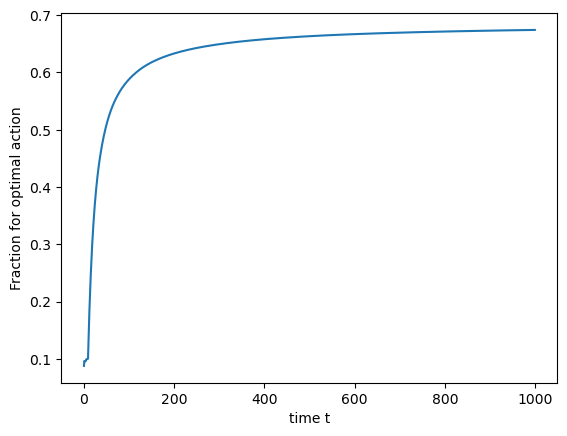

In [4]:
# initialization of Nruns
timesteps = 1000 # for how long the agent must play the bandit
metric_saver_fp = np.zeros(timesteps)
n_runs = 2000

for i in (range(n_runs)):
    # initialization of algorithm (re-extract the bandits every time)
    q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 
    Q = np.zeros(n_levers)
    N = np.zeros(n_levers)
    
    best_action = np.argmax(q_star)
    actions = np.zeros(timesteps) # save the actions
    # loop
    for t in (range(timesteps)):
        a_idx = greedy_algorithm_with_first_push(Q,t)   # pick an action
        N[a_idx] += 1                                   # increase the counter for that action
        R = reward_generator(a_idx,q_star,std)          # generate the reward
        Q = update_Q(Q,N,a_idx,R)                       # update Q
        actions[t] = a_idx
    
    # convert actions array in cumulative times of best action taken
    metric = optimal_action_metric(actions,best_action)
    metric_saver_fp = metric_saver_fp + (metric - metric_saver_fp)/(i+1)
    
plt.plot(np.arange(0,timesteps,1),metric_saver_fp)
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.show()

    

# Silly Greedy

In [5]:
def silly_greedy_algorithm(Q,t):
    # find out the value of the max
    a_idx = np.argmax(Q)
    # check if there are more than one == to max
    n_max = np.where(Q == Q[a_idx])[0]
    # if there is only one, that's our man!
    if len(n_max == 1):
        return a_idx
    # if there are ties, we should pick one randomly
    else:
        a_idx = int(len(n_max) * np.random.uniform(0,1))
        return a_idx
    

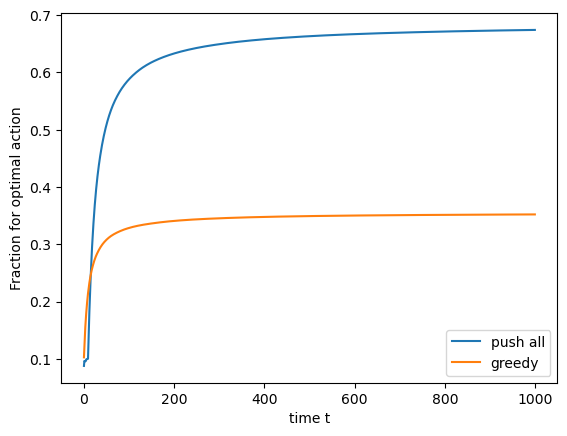

In [6]:
# initialization of Nruns
timesteps = 1000 # for how long the agent must play the bandit
metric_saver_g = np.zeros(timesteps)
n_runs = 2000

for i in (range(n_runs)):
    # initialization of algorithm (re-extract the bandits every time)
    q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 
    Q = np.zeros(n_levers)
    N = np.zeros(n_levers)
    
    best_action = np.argmax(q_star)
    actions = np.zeros(timesteps) # save the actions
    # loop
    for t in (range(timesteps)):
        a_idx = silly_greedy_algorithm(Q,t)   # pick an action
        N[a_idx] += 1                                   # increase the counter for that action
        R = reward_generator(a_idx,q_star,std)          # generate the reward
        Q = update_Q(Q,N,a_idx,R)                       # update Q
        actions[t] = a_idx
    
    # convert actions array in cumulative times of best action taken
    metric = optimal_action_metric(actions,best_action)
    metric_saver_g = metric_saver_g + (metric - metric_saver_g)/(i+1)
    
plt.plot(np.arange(0,timesteps,1),metric_saver_fp, label = 'push all')
plt.plot(np.arange(0,timesteps,1),metric_saver_g, label = 'greedy')
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.legend()
plt.show()

    

# $\epsilon$ Greedy 

In [7]:
def epsilon_greedy_algorithm(Q,epsilon):
    # find out the value of the max
    a_idx = np.argmax(Q)
    # extract a number to decide what to do
    dec = np.random.uniform(0,1)
    
    # greedy choice
    if (dec > epsilon):
        # check if there are more than one == to max
        n_max = np.where(Q == Q[a_idx])[0]
        # if there is only one, that's our man!
        if len(n_max == 1):
            return a_idx
        # if there are ties, we should pick one randomly
        else:
            a_idx = int(len(n_max) * np.random.uniform(0,1))
            return a_idx
    # non-greedy choice
    else:
        # possible choices
        pos = np.arange(0,len(Q),1)
        pos = pos[pos != a_idx] # remove the argmax
        a_idx = pos[int(len(pos)*np.random.uniform(0,1))] # pick one random
        return a_idx
        
    

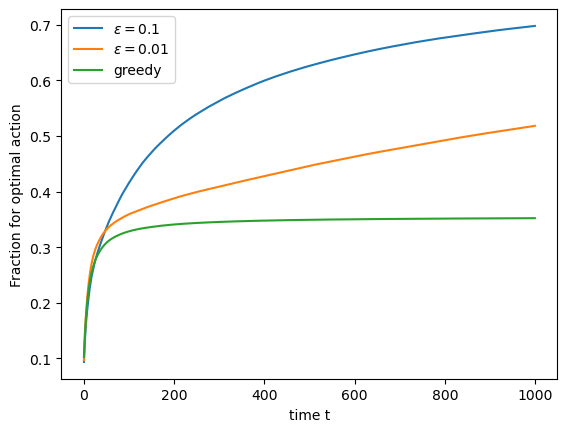

In [8]:
# initialization of Nruns
timesteps = 1000 # for how long the agent must play the bandit
n_runs = 2000
epsilons = [0.1,0.01]
metric_saver_eg_vector=[]

for epsilon in epsilons:
    metric_saver_eg = np.zeros(timesteps)
    for i in (range(n_runs)):
        # initialization of algorithm (re-extract the bandits every time)
        q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 
        Q = np.zeros(n_levers)
        N = np.zeros(n_levers)
        
        best_action = np.argmax(q_star)
        actions = np.zeros(timesteps) # save the actions
        # loop
        for t in (range(timesteps)):
            a_idx = epsilon_greedy_algorithm(Q,epsilon)   # pick an action
            N[a_idx] += 1                                   # increase the counter for that action
            R = reward_generator(a_idx,q_star,std)          # generate the reward
            Q = update_Q(Q,N,a_idx,R)                       # update Q
            actions[t] = a_idx
        
        # convert actions array in cumulative times of best action taken
        metric = optimal_action_metric(actions,best_action)
        metric_saver_eg = metric_saver_eg + (metric - metric_saver_eg)/(i+1)
    metric_saver_eg_vector.append(metric_saver_eg)
    plt.plot(np.arange(0,timesteps,1),metric_saver_eg, label = f'$\epsilon = {epsilon}$')
    
plt.plot(np.arange(0,timesteps,1),metric_saver_g, label = 'greedy')
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.legend()
plt.show()

    

# Optimistic Initial Values


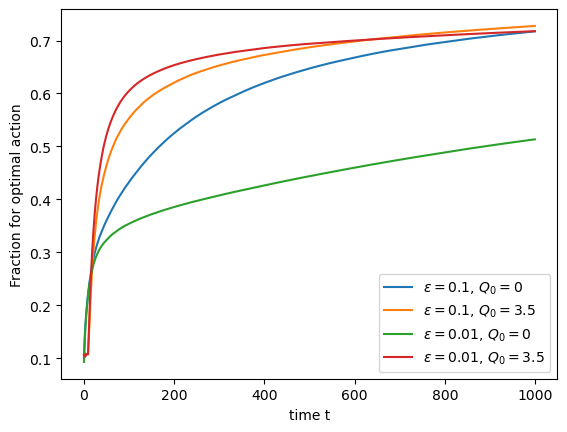

In [9]:
# initialization of Nruns
timesteps = 1000 # for how long the agent must play the bandit
n_runs = 2000
epsilons = [0.1,0.01]
Q_zeros = [0,3.5]
metric_saver_egoiv_vector=[]
for epsilon in epsilons:
    for q_zero in Q_zeros:
        metric_saver_egoiv = np.zeros(timesteps)
        for i in (range(n_runs)):
            # initialization of algorithm (re-extract the bandits every time)
            q_star = np.random.normal(loc = mean, scale = std, size = n_levers) # true value of the means 

            if q_zero == 0:
                Q = np.zeros(n_levers)
            else:
                Q = np.ones(n_levers)*q_zero # optimistic initialization
            N = np.zeros(n_levers)
            
            best_action = np.argmax(q_star)
            actions = np.zeros(timesteps) # save the actions
            # loop
            for t in (range(timesteps)):
                a_idx = epsilon_greedy_algorithm(Q,epsilon)   # pick an action
                N[a_idx] += 1                                   # increase the counter for that action
                R = reward_generator(a_idx,q_star,std)          # generate the reward
                Q = update_Q(Q,N,a_idx,R)                       # update Q
                actions[t] = a_idx
            
            # convert actions array in cumulative times of best action taken
            metric = optimal_action_metric(actions,best_action)
            metric_saver_egoiv = metric_saver_egoiv + (metric - metric_saver_egoiv)/(i+1)
        metric_saver_egoiv_vector.append(metric_saver_egoiv)
            
        plt.plot(np.arange(0,timesteps,1),metric_saver_egoiv, label = f'$\epsilon = {epsilon}$, $Q_0 = {q_zero}$')
#plt.plot(np.arange(0,timesteps,1),metric_saver_g, label = 'greedy')
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.legend()
plt.show()

    

# Bayesian K-Armed bandit

In [4]:
def optimal_action_metric(actions, best_action):
    num = np.cumsum(actions == best_action) 
    den = np.arange(1,len(actions)+1,1)
    return num/den

def thompson_sampling(mu_prior, std_prior):
    theta = np.random.normal(mu_prior, std_prior)
    return np.argmax(theta)

def reward_generator(a, q_star, env_std):
    return np.random.normal(q_star[a], env_std)

def update_posterior(mu_prior, std_prior, a, reward, std_like):
    var_prior = std_prior[a]**2
    var_like = std_like**2

    # posterior
    var_post = 1./(1./var_prior + 1./var_like)
    mu_post = var_post*(mu_prior[a]/var_prior+reward/var_like)

    # update
    mu_prior[a] = mu_post
    std_prior[a] = np.sqrt(var_post)

    return mu_prior, std_prior



In [5]:

np.random.seed(3110) # set seed to replicate results

# parameters of our "hidden distribution" of prizes
n_levers = 10

In [6]:
timesteps = 1000
n_runs = 2000

real_mean = 0.0
real_std = 1.0

std_like = 1.0

metric_saver_b = np.zeros(timesteps)

for i in range(n_runs):

    # true arms' values 
    q_star = np.random.normal(real_mean, real_std, size=n_levers)
    best_action = np.argmax(q_star)

    # prior initialization
    Q = np.zeros(n_levers)
    std = np.ones(n_levers) * 100.0

    actions = np.zeros(timesteps)
    for t in range(timesteps):
        a_idx = thompson_sampling(Q, std)
        R = reward_generator(a_idx, q_star, std_like)
        Q, std = update_posterior(Q, std, a_idx, R, std_like)
        actions[t] = a_idx

    metric = optimal_action_metric(actions, best_action)
    metric_saver_b += (metric-metric_saver_b)/(i+1)
    


In [7]:
bayesian_regret=regret(np.arange(0,timesteps,1), metric_saver_b,timesteps)

In [8]:
bayesian_regret

0.2623282299952127

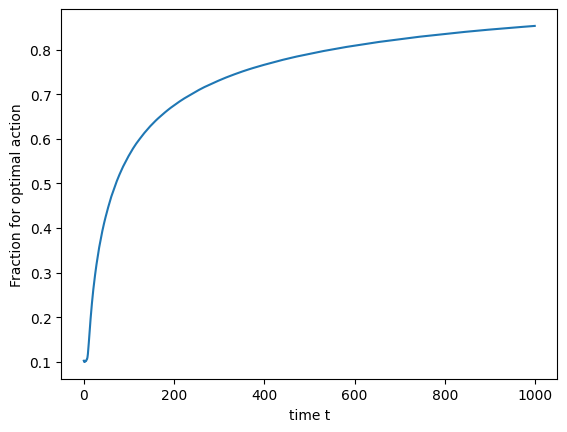

In [9]:
plt.plot(np.arange(0,timesteps,1),metric_saver_b)
plt.xlabel('time t')
plt.ylabel('Fraction for optimal action')
plt.show()


# Regrets

In [16]:
eg_regret=[regret(np.arange(0,timesteps,1), metric_saver_eg_vector[i],timesteps) for i in range(len(metric_saver_eg_vector))]
egoiv_regret=[regret(np.arange(0,timesteps,1), metric_saver_egoiv_vector[i],timesteps) for i in range(len(metric_saver_egoiv_vector))]
bayesian_regret=regret(np.arange(0,timesteps,1), metric_saver_b,timesteps)
greedy_regret=regret(np.arange(0,timesteps,1), metric_saver_fp,timesteps)
silly_regret=regret(np.arange(0,timesteps,1), metric_saver_g,timesteps)

In [28]:
print(f'Greedy: {greedy_regret} \n'
      f'Silly: {silly_regret} \n'
      f'ε-greedy: {eg_regret} \n'
      f'Optimistic Intial Values: {egoiv_regret} \n'
      f'Bayesian: {bayesian_regret}')


Greedy: 0.3639610605978919 
Silly: 0.6585216359813874 
ε-greedy: [0.4145927816940567, 0.564255433659547] 
Optimistic Intial Values: [0.3948977541780831, 0.34712362406602393, 0.567567775846217, 0.33474211376095536] 
Bayesian: 0.26297252647444497


# Bayesian framework: general case


We now consider a more general case, in which rewards do not not necessarily follow a gaussian distribution, and thus we do not have an analytical posterior. We consider two possible approaches to aprroximate and sample from the posterior distribution at each update: MCMC-based method and Variational inference. 

### Bayesian Multi-Armed Bandit (MAB) agent with Markov Chain Monte Carlo (MCMC)

Again, we want to use Thomson sampling:
-the agent maintains a probability distribution (belief) for the reward of each arm.
- Sampling: in every step, the agent draws one random sample from each arm's belief distribution.
- Action: it picks the arm that produced the highest sample.
- Update: after observing the reward, it uses Bayes' Theorem to update its belief (posterior of each arm). 

Here, each arm's reward follows a **Gaussian distribution with a certain mean and variance, both uknown to the agent**. We use a **T-student prior** for each arm, in order to allow the possibility of large tails for the rewards distributions. 
Therefore, we do not have an analytical expression for the posterior distribution of the parameters of each arm: we use MCMC to numerically approximate the posterior and sample from it at each update. We then use again Thomson sampling, picking a single sample of the posterior means, and choosing the arm with the highest mean as action. In this case the means' estimate also depend on the posterior estimate of the variances.   

In [39]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import warnings

class GeneralMCMCBandit:
    def __init__(self, n_arms, n_samples=100):
        self.n_arms = n_arms
        self.n_samples = n_samples
        
        self.actions = [] # indices of arms pulled
        self.rewards = [] # history of rewards observed
        
        # Initial belief: samples drawn from the prior... We start with a matrix of (n_samples, n_arms)
        # For mu, start with a random guess centered at 0
        self.posterior_mu = np.random.standard_t(df=3, size=(n_samples, n_arms))
        # For sigma, we start with a guess centered around 1.0
        self.posterior_sigma = np.abs(np.random.normal(loc=1.0, scale=0.5, size=(n_samples, n_arms)))

    def select_arm(self):
        """
        Thompson Sampling:
        - Pick a random sample (row) from our posterior belief.
        - Pick the arm with the highest mean in that sample."""
     
        random_idx = np.random.randint(0, self.posterior_mu.shape[0])
        # the sample row contains one potential reality for all arms
        sample_means = self.posterior_mu[random_idx] 
        return np.argmax(sample_means)

    def update(self, action, reward):
        self.actions.append(action)
        self.rewards.append(reward)
        
        # use numpy for PyMC
        obs_actions = np.array(self.actions) 
        obs_rewards = np.array(self.rewards)
        
        # GENERAL FRAMEWORK (MCMC)
        # in pm.sample i have n samples=100 and tune=1000 (burn in), 
        # I update the chain (posterior) 1100 times (so i'll have 1100 different mu and thus mu_observed)...
        # we keep only the last 100 as sampled samples, among which we then use thomsomn sampling and keep a single one, to choose the best arm
        
        with pm.Model() as model: # every variable defined inside this block belongs to a specific probabilistic model
            
            # PRIORS: # These define rules and not variables assignment 
            
            # Prior for the spread (noise) of the arms; use half-normal since we assume it's positive
            sigma = pm.HalfNormal('sigma', sigma=1.0, shape=self.n_arms) 
            
            # Prior for the Mean reward of the arms: T-Student (allows for outliers/heavy tails)
            # This is NON-conjugate with a Gaussian likelihood.
            mu = pm.StudentT('mu', nu=3, mu=0, sigma=2.0, shape=self.n_arms)
            
            # LIKELIHOOD CONSTRUCTION
            # At each update we compute the joint likelihood of the whole history of rewards 
            # (instead of updating at each step the prior with the previous posterior, that we do not have explicitely)
            
            # We need to map the "actions" history to their "mu" and "sigma" parameters...
            # mu[obs_actions] selects the mu corresponding to the arm pulled at that step.
          
            mu_selected = mu[obs_actions] # vector with succesion of the estimated mu for the pulled arm at the different timesteps
            sigma_selected = sigma[obs_actions]
            

            y = pm.Normal('y', mu= mu_selected, sigma= sigma_selected, observed=obs_rewards) # 'observed =' tells the model this is the likeilihood of the observed data!
            
            # INFERENCE
            # Run NUTS sampler based on previous prior and likelihood: it runs (multiple parallel) chians using Hamiltonian Monte-Carlo 
            # tune=500: warmup steps (burn in)
            
            # draws=self.n_samples: how many posterior samples to keep 
            idata = pm.sample(draws=self.n_samples, tune=1000, chains=1, progressbar=False)
            
            # extract the posterior samples for 'mu' and 'sigma'
            extracted = az.extract(idata, var_names=['mu','sigma'])
            
            self.posterior_mu = extracted['mu'].values.T
            self.posterior_sigma=  extracted['sigma'].values.T


Only 100 samples in chain.


True Means: [1.0, -2.0, -5.0, 6.0, 3.0, -4.0]
True Sigmas: [1.0, 0.5, 2.0, 2.0, 3.0, 0.5]
----------------------------------------
Step 1: Pulled Arm 2, Reward -4.94


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 4 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 2: Pulled Arm 1, Reward -1.74


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 3: Pulled Arm 0, Reward -0.35


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 4: Pulled Arm 3, Reward 11.80


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 5: Pulled Arm 3, Reward 10.05


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 6: Pulled Arm 3, Reward 4.44


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 7: Pulled Arm 3, Reward 8.68


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 8: Pulled Arm 3, Reward 2.79


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 9: Pulled Arm 3, Reward 6.82


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 10: Pulled Arm 3, Reward 5.56


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 11: Pulled Arm 3, Reward 7.96


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 12: Pulled Arm 3, Reward 8.33


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 13: Pulled Arm 3, Reward 8.15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 14: Pulled Arm 3, Reward 6.81


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 15: Pulled Arm 3, Reward 6.47


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 16: Pulled Arm 3, Reward 8.37


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 17: Pulled Arm 3, Reward 5.94


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 18: Pulled Arm 4, Reward -1.92


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 19: Pulled Arm 3, Reward 5.34


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 20: Pulled Arm 3, Reward 9.22


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 21: Pulled Arm 3, Reward 5.11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 22: Pulled Arm 3, Reward 3.79


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 23: Pulled Arm 3, Reward 6.03


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 24: Pulled Arm 3, Reward 4.04


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 25: Pulled Arm 3, Reward 7.95


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 26: Pulled Arm 3, Reward 6.52


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 27: Pulled Arm 3, Reward 2.91


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 28: Pulled Arm 3, Reward 6.32


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 29: Pulled Arm 3, Reward 3.45


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 30: Pulled Arm 3, Reward -0.84


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 31: Pulled Arm 3, Reward 5.18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 32: Pulled Arm 3, Reward 8.30


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 33: Pulled Arm 3, Reward 7.47


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 34: Pulled Arm 3, Reward 6.10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 35: Pulled Arm 3, Reward 2.03


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 36: Pulled Arm 3, Reward 5.17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 37: Pulled Arm 3, Reward 6.39


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 38: Pulled Arm 3, Reward 7.20


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 39: Pulled Arm 3, Reward 11.81


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 40: Pulled Arm 3, Reward 4.11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 41: Pulled Arm 3, Reward 7.38


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 42: Pulled Arm 3, Reward 3.15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 43: Pulled Arm 3, Reward 3.40


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 44: Pulled Arm 3, Reward 5.37


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 45: Pulled Arm 3, Reward 5.44


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 46: Pulled Arm 3, Reward 6.19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 47: Pulled Arm 5, Reward -3.90


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 48: Pulled Arm 3, Reward 6.13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 49: Pulled Arm 3, Reward 8.36


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 50: Pulled Arm 3, Reward 6.47


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 51: Pulled Arm 3, Reward 5.92


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 52: Pulled Arm 3, Reward 4.72


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 53: Pulled Arm 3, Reward 6.94


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 54: Pulled Arm 3, Reward 6.64


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 55: Pulled Arm 3, Reward 7.84


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 56: Pulled Arm 3, Reward 4.75


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 57: Pulled Arm 3, Reward -1.32


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 58: Pulled Arm 3, Reward 6.77


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 59: Pulled Arm 3, Reward 5.83


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 60: Pulled Arm 3, Reward 5.58


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 61: Pulled Arm 3, Reward 4.14


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 62: Pulled Arm 3, Reward 4.59


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 63: Pulled Arm 3, Reward 7.30


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 64: Pulled Arm 3, Reward 5.91


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 65: Pulled Arm 3, Reward 4.17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 66: Pulled Arm 3, Reward 6.66


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 67: Pulled Arm 3, Reward 4.19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 68: Pulled Arm 3, Reward 4.34


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 69: Pulled Arm 3, Reward 8.18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 70: Pulled Arm 3, Reward 4.09


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 71: Pulled Arm 3, Reward 6.96


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 72: Pulled Arm 3, Reward 3.05


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 73: Pulled Arm 3, Reward 5.32


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 74: Pulled Arm 3, Reward 6.11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 75: Pulled Arm 3, Reward 7.23


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 76: Pulled Arm 3, Reward 3.99


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 77: Pulled Arm 3, Reward 7.83


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 78: Pulled Arm 3, Reward 3.10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 79: Pulled Arm 3, Reward 5.82


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 80: Pulled Arm 3, Reward 9.08


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 81: Pulled Arm 3, Reward 8.18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 82: Pulled Arm 3, Reward 4.59


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 83: Pulled Arm 3, Reward 6.69


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 84: Pulled Arm 3, Reward 4.88


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 85: Pulled Arm 3, Reward 4.00


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 86: Pulled Arm 3, Reward 7.06


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 87: Pulled Arm 3, Reward 2.73


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 88: Pulled Arm 3, Reward 10.28


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 89: Pulled Arm 3, Reward 7.84


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 90: Pulled Arm 3, Reward 4.91


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 91: Pulled Arm 3, Reward 7.50


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 92: Pulled Arm 3, Reward 8.66


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 93: Pulled Arm 3, Reward 3.40


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 94: Pulled Arm 3, Reward 6.36


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 95: Pulled Arm 3, Reward 7.09


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 96: Pulled Arm 3, Reward 6.02


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 97: Pulled Arm 3, Reward 6.03


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 98: Pulled Arm 3, Reward 7.48


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 99: Pulled Arm 3, Reward 7.90


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 100: Pulled Arm 3, Reward 4.76


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 101: Pulled Arm 3, Reward 6.99


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 102: Pulled Arm 3, Reward 6.92


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 103: Pulled Arm 3, Reward 3.87


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 104: Pulled Arm 3, Reward 4.52


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 105: Pulled Arm 3, Reward 6.49


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 106: Pulled Arm 3, Reward 6.46


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 107: Pulled Arm 3, Reward 7.42


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 108: Pulled Arm 3, Reward 7.45


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 109: Pulled Arm 3, Reward 4.54


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 110: Pulled Arm 3, Reward 2.47


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 111: Pulled Arm 3, Reward 5.91


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 112: Pulled Arm 3, Reward 2.60


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 113: Pulled Arm 3, Reward 6.58


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 114: Pulled Arm 3, Reward 6.61


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 115: Pulled Arm 3, Reward 4.65


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 116: Pulled Arm 3, Reward 8.67


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 117: Pulled Arm 3, Reward 4.32


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 118: Pulled Arm 3, Reward 7.24


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 119: Pulled Arm 3, Reward 7.79


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 120: Pulled Arm 3, Reward 5.63


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 121: Pulled Arm 3, Reward 1.80


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 122: Pulled Arm 3, Reward 6.29


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 123: Pulled Arm 3, Reward 9.06


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 124: Pulled Arm 3, Reward 7.53


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 125: Pulled Arm 3, Reward 4.01


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 126: Pulled Arm 3, Reward 4.32


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 127: Pulled Arm 3, Reward 4.18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 128: Pulled Arm 3, Reward 3.45


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 129: Pulled Arm 3, Reward 7.04


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 130: Pulled Arm 3, Reward 6.45


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 131: Pulled Arm 3, Reward 11.12


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 132: Pulled Arm 3, Reward 10.10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 133: Pulled Arm 3, Reward 6.86


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 134: Pulled Arm 3, Reward 5.95


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 135: Pulled Arm 3, Reward 6.90


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 136: Pulled Arm 3, Reward 1.59


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 4 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 137: Pulled Arm 3, Reward 3.77


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 138: Pulled Arm 3, Reward 7.07


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 139: Pulled Arm 3, Reward 5.93


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 140: Pulled Arm 3, Reward 4.55


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 141: Pulled Arm 3, Reward 3.91


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 142: Pulled Arm 3, Reward 5.47


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 143: Pulled Arm 3, Reward 5.21


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 144: Pulled Arm 3, Reward 6.84


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 145: Pulled Arm 3, Reward 7.54


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 146: Pulled Arm 3, Reward 6.29


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 147: Pulled Arm 3, Reward 7.81


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 148: Pulled Arm 3, Reward 8.56


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 149: Pulled Arm 3, Reward 4.86


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 150: Pulled Arm 3, Reward 7.82


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 151: Pulled Arm 3, Reward 3.84


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 152: Pulled Arm 3, Reward 6.68


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 153: Pulled Arm 3, Reward 8.84


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 154: Pulled Arm 3, Reward 2.97


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 155: Pulled Arm 3, Reward 3.92


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 156: Pulled Arm 3, Reward 6.99


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 157: Pulled Arm 3, Reward 7.46


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 158: Pulled Arm 3, Reward 8.02


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 159: Pulled Arm 3, Reward 6.38


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 160: Pulled Arm 3, Reward 5.11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 161: Pulled Arm 3, Reward 7.49


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 162: Pulled Arm 3, Reward 5.81


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 163: Pulled Arm 3, Reward 3.38


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 164: Pulled Arm 3, Reward 8.49


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 165: Pulled Arm 3, Reward 6.47


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 166: Pulled Arm 3, Reward 5.77


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 167: Pulled Arm 3, Reward 6.01


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 168: Pulled Arm 3, Reward 7.67


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 169: Pulled Arm 3, Reward 4.28


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 170: Pulled Arm 3, Reward 6.15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 171: Pulled Arm 3, Reward 6.59


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 172: Pulled Arm 3, Reward 3.39


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 173: Pulled Arm 3, Reward 5.65


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 174: Pulled Arm 3, Reward 7.03


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 175: Pulled Arm 3, Reward 10.69


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 176: Pulled Arm 3, Reward 3.81


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 177: Pulled Arm 3, Reward 8.40


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 178: Pulled Arm 3, Reward 4.96


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 179: Pulled Arm 3, Reward 5.45


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 180: Pulled Arm 3, Reward 3.52


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 181: Pulled Arm 3, Reward 5.49


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 182: Pulled Arm 3, Reward 4.75


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 183: Pulled Arm 3, Reward 5.70


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 184: Pulled Arm 3, Reward 4.68


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 185: Pulled Arm 3, Reward 2.95


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 186: Pulled Arm 3, Reward 8.90


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 187: Pulled Arm 3, Reward 5.96


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 188: Pulled Arm 3, Reward 4.75


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 189: Pulled Arm 3, Reward 2.42


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 190: Pulled Arm 3, Reward 8.25


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 191: Pulled Arm 3, Reward 5.08


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 192: Pulled Arm 3, Reward 7.29


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 193: Pulled Arm 3, Reward 6.61


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 194: Pulled Arm 3, Reward 9.15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 195: Pulled Arm 3, Reward 7.16


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 196: Pulled Arm 3, Reward 10.58


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 197: Pulled Arm 3, Reward 4.45


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 198: Pulled Arm 3, Reward 6.54


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 199: Pulled Arm 3, Reward 4.52


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 200: Pulled Arm 3, Reward 7.98


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 201: Pulled Arm 3, Reward 4.49


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 202: Pulled Arm 3, Reward 7.76


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 203: Pulled Arm 3, Reward 10.75


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 15 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 204: Pulled Arm 3, Reward 5.09


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 205: Pulled Arm 3, Reward 6.79


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 206: Pulled Arm 3, Reward 5.01


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 207: Pulled Arm 3, Reward 8.91


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 208: Pulled Arm 3, Reward 5.05


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 209: Pulled Arm 3, Reward 5.81


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 210: Pulled Arm 3, Reward 5.14


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 211: Pulled Arm 3, Reward 8.70


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 212: Pulled Arm 3, Reward 3.18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 213: Pulled Arm 3, Reward 4.26


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 214: Pulled Arm 3, Reward 6.18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 215: Pulled Arm 3, Reward 8.78


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 216: Pulled Arm 3, Reward 5.65


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 217: Pulled Arm 3, Reward 9.68


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 218: Pulled Arm 3, Reward 5.41


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 219: Pulled Arm 3, Reward 3.67


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 220: Pulled Arm 3, Reward 6.21


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 221: Pulled Arm 3, Reward 6.49


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 222: Pulled Arm 3, Reward 6.34


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 223: Pulled Arm 3, Reward 5.34


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 224: Pulled Arm 3, Reward 2.35


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 225: Pulled Arm 3, Reward 7.82


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 226: Pulled Arm 3, Reward 3.33


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 227: Pulled Arm 3, Reward 5.55


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 228: Pulled Arm 3, Reward 6.58


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 229: Pulled Arm 3, Reward 7.59


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 230: Pulled Arm 3, Reward 3.84


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 231: Pulled Arm 3, Reward 4.72


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 232: Pulled Arm 3, Reward 1.32


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 233: Pulled Arm 3, Reward 5.51


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 234: Pulled Arm 3, Reward 6.40


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 235: Pulled Arm 3, Reward 5.16


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 236: Pulled Arm 3, Reward 6.58


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 237: Pulled Arm 3, Reward 7.76


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 238: Pulled Arm 3, Reward 6.94


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 239: Pulled Arm 3, Reward 5.20


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 240: Pulled Arm 3, Reward 9.33


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 241: Pulled Arm 3, Reward 6.68


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 242: Pulled Arm 3, Reward 9.33


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 243: Pulled Arm 3, Reward 9.88


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 244: Pulled Arm 3, Reward 7.41


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 245: Pulled Arm 3, Reward 5.73


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 246: Pulled Arm 3, Reward 9.05


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 247: Pulled Arm 3, Reward 2.48


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 248: Pulled Arm 3, Reward 6.64


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Step 249: Pulled Arm 3, Reward 5.85


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 250: Pulled Arm 3, Reward 0.93


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 251: Pulled Arm 3, Reward 8.34


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 252: Pulled Arm 3, Reward 3.88


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 253: Pulled Arm 3, Reward 9.27


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 254: Pulled Arm 3, Reward 8.96


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 255: Pulled Arm 3, Reward 8.30


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 256: Pulled Arm 3, Reward 9.00


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 257: Pulled Arm 3, Reward 4.66


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 258: Pulled Arm 3, Reward 7.10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 259: Pulled Arm 3, Reward 9.71


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 260: Pulled Arm 3, Reward 2.56


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 261: Pulled Arm 3, Reward 5.64


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 262: Pulled Arm 3, Reward 3.25


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 263: Pulled Arm 3, Reward 4.34


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 264: Pulled Arm 3, Reward 5.43


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 265: Pulled Arm 3, Reward 4.83


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 266: Pulled Arm 3, Reward 2.43


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 267: Pulled Arm 3, Reward 6.97


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 268: Pulled Arm 3, Reward 2.92


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 269: Pulled Arm 3, Reward 5.02


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 270: Pulled Arm 3, Reward 8.50


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 271: Pulled Arm 3, Reward 4.46


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 272: Pulled Arm 3, Reward 3.92


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 273: Pulled Arm 3, Reward 5.68


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 274: Pulled Arm 3, Reward 6.44


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 275: Pulled Arm 3, Reward 5.24


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 276: Pulled Arm 3, Reward 1.38


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 277: Pulled Arm 3, Reward 2.06


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 278: Pulled Arm 3, Reward 7.29


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 279: Pulled Arm 3, Reward 8.22


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 280: Pulled Arm 3, Reward 6.58


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 281: Pulled Arm 3, Reward 7.54


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 282: Pulled Arm 3, Reward 4.02


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 283: Pulled Arm 3, Reward 4.06


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 284: Pulled Arm 3, Reward 5.05


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 285: Pulled Arm 3, Reward 5.48


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 286: Pulled Arm 3, Reward 2.15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 287: Pulled Arm 3, Reward 9.94


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 288: Pulled Arm 3, Reward 3.46


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 289: Pulled Arm 3, Reward 6.76


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 290: Pulled Arm 3, Reward 6.73


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 291: Pulled Arm 3, Reward 2.99


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 292: Pulled Arm 3, Reward 3.94


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 293: Pulled Arm 3, Reward 5.39


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 294: Pulled Arm 3, Reward 8.52


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 295: Pulled Arm 3, Reward 3.72


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 296: Pulled Arm 3, Reward 8.94


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 297: Pulled Arm 3, Reward 7.16


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 298: Pulled Arm 3, Reward 4.35


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 299: Pulled Arm 3, Reward 2.88


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 300: Pulled Arm 3, Reward 5.96


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 301: Pulled Arm 3, Reward 4.27


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 302: Pulled Arm 3, Reward 7.48


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 303: Pulled Arm 3, Reward 6.61


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 304: Pulled Arm 3, Reward 8.17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 305: Pulled Arm 3, Reward 6.32


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 306: Pulled Arm 3, Reward 2.38


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 307: Pulled Arm 3, Reward 5.85


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 308: Pulled Arm 3, Reward 5.92


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 309: Pulled Arm 3, Reward 5.29


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 310: Pulled Arm 3, Reward 2.97


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 311: Pulled Arm 3, Reward 6.42


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 312: Pulled Arm 3, Reward 5.21


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 313: Pulled Arm 3, Reward 8.40


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 314: Pulled Arm 3, Reward 2.93


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 315: Pulled Arm 3, Reward 4.25


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 316: Pulled Arm 3, Reward 7.65


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 317: Pulled Arm 3, Reward 3.74


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 318: Pulled Arm 3, Reward 8.76


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 319: Pulled Arm 3, Reward 8.37


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 320: Pulled Arm 3, Reward 4.50


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 321: Pulled Arm 3, Reward 5.88


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 322: Pulled Arm 3, Reward 5.69


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 323: Pulled Arm 3, Reward 7.64


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 324: Pulled Arm 3, Reward 7.08


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 325: Pulled Arm 3, Reward 4.40


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 326: Pulled Arm 3, Reward 4.20


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 327: Pulled Arm 3, Reward 5.92


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 328: Pulled Arm 3, Reward 4.92


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 329: Pulled Arm 3, Reward 5.50


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 330: Pulled Arm 3, Reward 4.30


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 331: Pulled Arm 3, Reward 5.45


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 332: Pulled Arm 3, Reward 8.17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 333: Pulled Arm 3, Reward 5.85


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 334: Pulled Arm 3, Reward 7.33


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 335: Pulled Arm 3, Reward 7.32


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 336: Pulled Arm 3, Reward 4.99


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 337: Pulled Arm 3, Reward 8.40


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 338: Pulled Arm 3, Reward 8.18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Step 339: Pulled Arm 3, Reward 3.82


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 340: Pulled Arm 3, Reward 6.51


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 341: Pulled Arm 3, Reward 5.80


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 342: Pulled Arm 3, Reward 5.69


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 343: Pulled Arm 3, Reward 4.70


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 344: Pulled Arm 3, Reward 4.00


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 345: Pulled Arm 3, Reward 5.97


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 346: Pulled Arm 3, Reward 6.62


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 12 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 347: Pulled Arm 3, Reward 7.94


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 348: Pulled Arm 3, Reward 6.13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 349: Pulled Arm 3, Reward 1.14


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 350: Pulled Arm 3, Reward 6.01


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 351: Pulled Arm 3, Reward 7.18


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 352: Pulled Arm 3, Reward 7.97


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 353: Pulled Arm 3, Reward 8.86


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 354: Pulled Arm 3, Reward 6.73


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 355: Pulled Arm 3, Reward 9.30


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 356: Pulled Arm 3, Reward 10.65


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 357: Pulled Arm 3, Reward 5.00


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 358: Pulled Arm 3, Reward 5.09


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 359: Pulled Arm 3, Reward 4.36


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 360: Pulled Arm 3, Reward 6.65


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 361: Pulled Arm 3, Reward 2.42


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 362: Pulled Arm 3, Reward 7.82


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 363: Pulled Arm 3, Reward 6.90


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 364: Pulled Arm 3, Reward 4.86


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 365: Pulled Arm 3, Reward 0.56


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 366: Pulled Arm 3, Reward 5.13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 367: Pulled Arm 3, Reward 5.03


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 368: Pulled Arm 3, Reward 5.04


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 369: Pulled Arm 3, Reward 10.70


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 370: Pulled Arm 3, Reward 5.91


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 5 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 371: Pulled Arm 3, Reward 7.49


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 372: Pulled Arm 3, Reward 5.71


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 373: Pulled Arm 3, Reward 6.72


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 374: Pulled Arm 3, Reward 7.05


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 2743 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Step 375: Pulled Arm 3, Reward 4.69


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 376: Pulled Arm 3, Reward 8.46


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 377: Pulled Arm 3, Reward 6.68


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 378: Pulled Arm 3, Reward 7.58


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 379: Pulled Arm 3, Reward 8.21


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 380: Pulled Arm 3, Reward 6.17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 381: Pulled Arm 3, Reward 9.80


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 382: Pulled Arm 3, Reward 2.93


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 383: Pulled Arm 3, Reward 4.35


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 384: Pulled Arm 3, Reward 8.33


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 385: Pulled Arm 3, Reward 4.13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 386: Pulled Arm 3, Reward 4.50


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 387: Pulled Arm 3, Reward 2.35


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 388: Pulled Arm 3, Reward 5.35


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 389: Pulled Arm 3, Reward 5.19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 390: Pulled Arm 3, Reward 6.27


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 391: Pulled Arm 3, Reward 6.08


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 392: Pulled Arm 3, Reward 7.98


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 393: Pulled Arm 3, Reward 7.77


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 394: Pulled Arm 3, Reward 6.17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 395: Pulled Arm 3, Reward 9.81


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 12 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 396: Pulled Arm 3, Reward 5.06


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 397: Pulled Arm 3, Reward 3.97


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 398: Pulled Arm 3, Reward 4.25


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 399: Pulled Arm 3, Reward 3.80


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 400: Pulled Arm 3, Reward 4.34


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 401: Pulled Arm 3, Reward 0.54


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 402: Pulled Arm 3, Reward 6.74


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 12 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 403: Pulled Arm 3, Reward 5.02


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 404: Pulled Arm 3, Reward 4.68


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 405: Pulled Arm 3, Reward 2.99


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 406: Pulled Arm 3, Reward 6.04


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 407: Pulled Arm 3, Reward 6.77


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 408: Pulled Arm 3, Reward 2.82


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 409: Pulled Arm 3, Reward 5.45


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 410: Pulled Arm 3, Reward 3.31


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 411: Pulled Arm 3, Reward 4.55


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 412: Pulled Arm 3, Reward 7.56


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 413: Pulled Arm 3, Reward 2.66


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 414: Pulled Arm 3, Reward 6.38


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 415: Pulled Arm 3, Reward 7.49


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 416: Pulled Arm 3, Reward 5.66


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 417: Pulled Arm 3, Reward 8.72


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 418: Pulled Arm 3, Reward 2.11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 419: Pulled Arm 3, Reward 7.74


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 420: Pulled Arm 3, Reward 6.67


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 421: Pulled Arm 3, Reward 4.12


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 422: Pulled Arm 3, Reward 8.82


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 423: Pulled Arm 3, Reward 5.24


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 424: Pulled Arm 3, Reward 8.50


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 425: Pulled Arm 3, Reward 6.12


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 426: Pulled Arm 3, Reward 5.64


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 427: Pulled Arm 3, Reward 4.26


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 428: Pulled Arm 3, Reward 4.62


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 429: Pulled Arm 3, Reward 8.40


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 430: Pulled Arm 3, Reward 5.67


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 431: Pulled Arm 3, Reward 10.44


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 432: Pulled Arm 3, Reward 8.65


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 433: Pulled Arm 3, Reward 7.82


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 434: Pulled Arm 3, Reward 5.13


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 435: Pulled Arm 3, Reward 5.81


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 436: Pulled Arm 3, Reward 8.36


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 437: Pulled Arm 3, Reward 6.41


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 438: Pulled Arm 3, Reward 5.40


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 439: Pulled Arm 3, Reward 4.19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 440: Pulled Arm 3, Reward 4.45


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 441: Pulled Arm 3, Reward 6.55


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 442: Pulled Arm 3, Reward 5.79


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 443: Pulled Arm 3, Reward 5.19


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 444: Pulled Arm 3, Reward 8.16


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 445: Pulled Arm 3, Reward 4.38


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 446: Pulled Arm 3, Reward 7.17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 447: Pulled Arm 3, Reward 4.15


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 448: Pulled Arm 3, Reward 6.34


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 449: Pulled Arm 3, Reward 2.95


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 450: Pulled Arm 3, Reward 2.80


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 451: Pulled Arm 3, Reward 7.23


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 452: Pulled Arm 3, Reward 6.74


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 453: Pulled Arm 3, Reward 5.97


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 454: Pulled Arm 3, Reward 6.40


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 455: Pulled Arm 3, Reward 6.08


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 456: Pulled Arm 3, Reward 6.57


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 457: Pulled Arm 3, Reward 5.39


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 458: Pulled Arm 3, Reward 9.64


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 459: Pulled Arm 3, Reward 3.85


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 460: Pulled Arm 3, Reward 7.37


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Step 461: Pulled Arm 3, Reward 8.39


Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 462: Pulled Arm 3, Reward 8.10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 463: Pulled Arm 3, Reward 1.30


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 464: Pulled Arm 3, Reward 5.02


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 465: Pulled Arm 3, Reward 4.48


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 466: Pulled Arm 3, Reward 4.80


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 467: Pulled Arm 3, Reward 6.83


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 468: Pulled Arm 3, Reward 4.01


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 469: Pulled Arm 3, Reward 11.90


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 470: Pulled Arm 3, Reward 7.73


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 471: Pulled Arm 3, Reward 6.23


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 472: Pulled Arm 3, Reward 7.17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 473: Pulled Arm 3, Reward 6.41


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 474: Pulled Arm 3, Reward 7.87


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 475: Pulled Arm 3, Reward 4.05


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 476: Pulled Arm 3, Reward 5.80


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 477: Pulled Arm 3, Reward 5.38


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 478: Pulled Arm 3, Reward 9.57


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 479: Pulled Arm 3, Reward 7.65


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 480: Pulled Arm 3, Reward 6.21


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 481: Pulled Arm 3, Reward 5.88


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 482: Pulled Arm 3, Reward 7.11


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 483: Pulled Arm 3, Reward 7.35


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 484: Pulled Arm 3, Reward 4.38


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 485: Pulled Arm 3, Reward 6.05


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 486: Pulled Arm 3, Reward 4.17


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 487: Pulled Arm 3, Reward 8.52


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 488: Pulled Arm 3, Reward 3.39


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 489: Pulled Arm 3, Reward 8.98


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 490: Pulled Arm 3, Reward 10.82


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 491: Pulled Arm 3, Reward 6.04


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 492: Pulled Arm 3, Reward 7.52


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 493: Pulled Arm 3, Reward 6.55


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 494: Pulled Arm 3, Reward 2.56


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 14 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 495: Pulled Arm 3, Reward 5.22


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 11 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 496: Pulled Arm 3, Reward 4.35


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 497: Pulled Arm 3, Reward 4.87


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 13 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 498: Pulled Arm 3, Reward 9.30


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 9 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 499: Pulled Arm 3, Reward 6.86


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.


Step 500: Pulled Arm 3, Reward 7.04


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]
Sampling 1 chain for 1_000 tune and 100 draw iterations (1_000 + 100 draws total) took 10 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


----------------------------------------
Final Estimated Means and Standard Deviations (Posterior):
Arm 0: Mean -0.07 (True 1.0), Std 0.746 (True 1.0)
Arm 1: Mean -1.47 (True -2.0), Std 0.927 (True 0.5)
Arm 2: Mean -4.28 (True -5.0), Std 0.946 (True 2.0)
Arm 3: Mean 6.00 (True 6.0), Std 2.073 (True 2.0)
Arm 4: Mean -1.31 (True 3.0), Std 1.028 (True 3.0)
Arm 5: Mean -3.21 (True -4.0), Std 0.955 (True 0.5)
Regret: 0.048


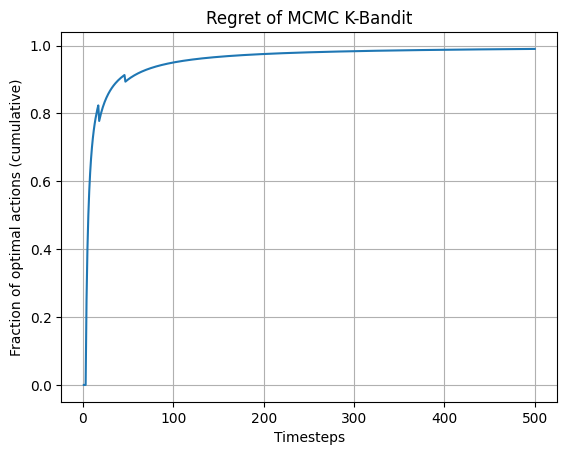

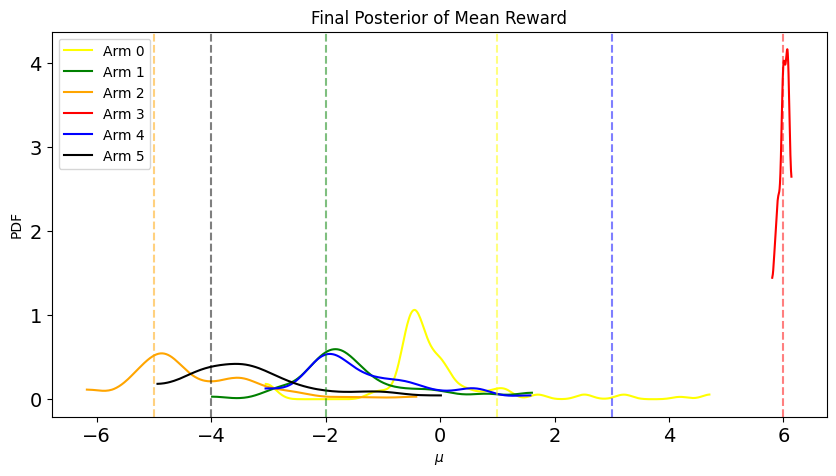

In [42]:
# SIMULATION: single run (game) for N_steps=500

def run_gaussian_simulation():
    # 6 arms with different Means and Sigmas
    # Arm 3 is the best (mean=6)
    
    TRUE_MEANS = [1.0, -2.0, -5.0, 6.0, 3.0, -4.0] 
    TRUE_SIGMAS = [1.0, 0.5, 2.0, 2.0, 3.0, 0.5] # the best arm is also the noisiest!
    N_ARMS = len(TRUE_MEANS)
    N_STEPS = 500
    
    agent = GeneralMCMCBandit(N_ARMS, n_samples=100)
    
    optimal_action_history = []
    best_possible_mean = np.max(TRUE_MEANS)
    
    print(f"True Means: {TRUE_MEANS}")
    print(f"True Sigmas: {TRUE_SIGMAS}")
    print("-" *40)
    
    for t in range(N_STEPS):
        
        # 1. agent picks arm
        arm = agent.select_arm()
        
        # 2. generate Gaussian reward
        reward = np.random.normal(loc=TRUE_MEANS[arm], scale=TRUE_SIGMAS[arm])
        
        # 3. agent updates posterior 
        print(f"Step {t+1}: Pulled Arm {arm}, Reward {reward:.2f}")
        agent.update(arm, reward) 
        
        # 4. calculate Regret (based on the arm choice, not on the noisy reward)
        # Regret is:  1-the normalized area under the curve of the fraction of optimal choices vs timesteps  
        is_optimal= 1 if TRUE_MEANS[arm]==best_possible_mean else 0
        optimal_action_history.append(is_optimal)

    optimal_fraction_curve= np.cumsum(optimal_action_history)/np.arange(1,N_STEPS+1)
    regret= (N_STEPS - np.trapz(optimal_fraction_curve,np.arange(1,N_STEPS+1)))/N_STEPS 

    print("-" * 40)
    print("Final Estimated Means and Standard Deviations (Posterior):")
    estimated_means = np.mean(agent.posterior_mu, axis=0)
    estimated_stds = np.mean(agent.posterior_sigma, axis=0)
    for k in range(N_ARMS):
        print(f"Arm {k}: Mean {estimated_means[k]:.2f} (True {TRUE_MEANS[k]}), Std {estimated_stds[k]:.3f} (True {TRUE_SIGMAS[k]})")
    print(f"Regret: {regret:.3f}")
    
    # Visualization
    
    # Fraction of optimal choices
    plt.plot(np.arange(1,N_STEPS+1),optimal_fraction_curve,label=f'Regret={regret:.2f}')
    plt.xlabel("Timesteps")
    plt.ylabel("Fraction of optimal actions (cumulative)")
    plt.title("Regret of MCMC K-Bandit")
    plt.grid()
    plt.show()

    # Final Posterior Distributions for mu 
    colors=['yellow','green','orange','red','blue','black']
    plt.figure(figsize=(10,5))
    for k in range(N_ARMS):
        az.plot_dist(agent.posterior_mu[:, k], label=f'Arm {k}',color=colors[k])
        
    plt.axvline(TRUE_MEANS[0], color='yellow', linestyle='--', alpha=0.5)
    plt.axvline(TRUE_MEANS[1], color='green', linestyle='--', alpha=0.5)
    plt.axvline(TRUE_MEANS[2], color='orange', linestyle='--', alpha=0.5)
    plt.axvline(TRUE_MEANS[3], color='red', linestyle='--', alpha=0.5)
    plt.axvline(TRUE_MEANS[4], color='blue', linestyle='--', alpha=0.5)
    plt.axvline(TRUE_MEANS[5], color='black', linestyle='--', alpha=0.5)
    plt.title("Final Posterior of Mean Reward")
    plt.legend(loc='best')
    plt.xlabel(r'$\mu$')
    plt.ylabel('PDF')
    plt.show()

if __name__ == "__main__":
    run_gaussian_simulation()